# SUYASH PRATAP SINGH(181B226)

In [5]:
import pandas as pd
import numpy as np
#check version
print(pd.__version__)

1.0.3


# 2. How to create a series from a list, numpy array and dict?

In [6]:
a_list = list("abcdefg")
numpy_array = np.arange(1, 10)
dictionary = {"A":  0, "B":1, "C":2, "D":3, "E":5}

In [7]:
series1 = pd.Series(a_list)
print(series1)
series2 = pd.Series(numpy_array)
print(series2)
series3 = pd.Series(dictionary)
print(series3)

0    a
1    b
2    c
3    d
4    e
5    f
6    g
dtype: object
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int32
A    0
B    1
C    2
D    3
E    5
dtype: int64


# 3. How to convert the index of a series into a column of a dataframe?

In [8]:
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)
print(ser[:5])

a    0
b    1
c    2
e    3
d    4
dtype: int64


In [9]:
ser_df = pd.DataFrame(ser)
ser_df.reset_index()

# using pandas to_frame()
ser_df = ser.to_frame().reset_index()
ser_df

,index,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4
5,f,5
6,g,6
7,h,7
8,i,8
9,j,9


# 4. How to combine many series to form a dataframe? 

In [10]:
# input
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

In [11]:
# using pandas DataFrame
ser_df = pd.DataFrame(ser1, ser2).reset_index()
ser_df.head()
# using pandas DataFrame with a dictionary, gives a specific name to the column
ser_df = pd.DataFrame({"col1":ser1, "col2":ser2})
ser_df.head(5)
# using pandas concat
ser_df = pd.concat([ser1, ser2], axis = 1)
ser_df.head()

,0,1
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


# 5. How to assign name to the series’ index?

In [12]:
# input
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))

In [13]:
# using series rename method
ser.rename("alphabets")
# using series attribute
ser.name = "other_name"
ser

0     a
1     b
2     c
3     e
4     d
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
Name: other_name, dtype: object

# 6. How to get the items of series A not present in series B?

In [15]:
# input
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])
ser1[~ser1.isin(ser2)]

0    1
1    2
2    3
dtype: int64

# 7. Print Random five row from the dataset

In [21]:
ser.sample(5)

2    Other
4        2
7    Other
9    Other
3        2
dtype: object

# 8. How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?

In [22]:
state = np.random.RandomState(100)
ser = pd.Series(state.normal(10, 5, 25))
print(ser.describe())

# or using numpy
np.percentile(ser, q = [0, 25, 50, 75, 100])

count    25.000000
mean     10.435437
std       4.253118
min       1.251173
25%       7.709865
50%      10.922593
75%      13.363604
max      18.094908
dtype: float64


array([ 1.25117263,  7.70986507, 10.92259345, 13.36360403, 18.0949083 ])

# 9. How to get frequency counts of unique items of a series?

In [23]:
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))
ser.value_counts()

f    8
g    7
c    4
a    3
d    3
b    2
e    2
h    1
dtype: int64

# 10. How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?

In [24]:
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))
ser

0     2
1     4
2     2
3     2
4     2
5     3
6     3
7     1
8     1
9     1
10    4
11    4
dtype: int32

In [25]:
ser.value_counts()
ser[~ser.isin(ser.value_counts().index[:2])] = 'Other'
ser

0         2
1         4
2         2
3         2
4         2
5     Other
6     Other
7     Other
8     Other
9     Other
10        4
11        4
dtype: object

# 11. How to bin a numeric series to 10 groups of equal size?

In [26]:
ser = pd.Series(np.random.random(20))
ser

0     0.877707
1     0.872438
2     0.798503
3     0.603316
4     0.787441
5     0.602666
6     0.047028
7     0.192565
8     0.999060
9     0.617461
10    0.501084
11    0.986365
12    0.241274
13    0.187244
14    0.881609
15    0.576100
16    0.834922
17    0.836073
18    0.556530
19    0.079688
dtype: float64

In [28]:
print(pd.qcut(ser, q = 10))
# we can also pass labels
print(pd.qcut(ser, q = [0, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1], labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']).head())

0     (0.873, 0.892]
1     (0.835, 0.873]
2     (0.792, 0.835]
3      (0.592, 0.61]
4      (0.61, 0.792]
5      (0.592, 0.61]
6     (0.046, 0.176]
7     (0.176, 0.232]
8     (0.892, 0.999]
9      (0.61, 0.792]
10     (0.232, 0.54]
11    (0.892, 0.999]
12     (0.232, 0.54]
13    (0.176, 0.232]
14    (0.873, 0.892]
15     (0.54, 0.592]
16    (0.792, 0.835]
17    (0.835, 0.873]
18     (0.54, 0.592]
19    (0.046, 0.176]
dtype: category
Categories (10, interval[float64]): [(0.046, 0.176] < (0.176, 0.232] < (0.232, 0.54] < (0.54, 0.592] ... (0.792, 0.835] < (0.835, 0.873] < (0.873, 0.892] < (0.892, 0.999]]
0    9th
1    8th
2    7th
3    5th
4    6th
dtype: category
Categories (10, object): [1st < 2nd < 3rd < 4th ... 7th < 8th < 9th < 10th]


# How to convert a numpy array to a dataframe of given shape?

In [29]:
ser = pd.Series(np.random.randint(1, 10, 35))
ser

0     9
1     9
2     1
3     7
4     7
5     3
6     5
7     9
8     3
9     7
10    7
11    1
12    1
13    8
14    7
15    2
16    4
17    9
18    8
19    2
20    1
21    1
22    6
23    2
24    6
25    7
26    7
27    9
28    5
29    8
30    1
31    7
32    5
33    8
34    6
dtype: int32

In [31]:
# using numpy
print(pd.DataFrame(np.array(ser).reshape(7, 5)))

# using only pandas
print(pd.DataFrame(ser.values.reshape(7, 5)))

   0  1  2  3  4
0  9  9  1  7  7
1  3  5  9  3  7
2  7  1  1  8  7
3  2  4  9  8  2
4  1  1  6  2  6
5  7  7  9  5  8
6  1  7  5  8  6
   0  1  2  3  4
0  9  9  1  7  7
1  3  5  9  3  7
2  7  1  1  8  7
3  2  4  9  8  2
4  1  1  6  2  6
5  7  7  9  5  8
6  1  7  5  8  6


# 13. How to find the positions of numbers that are multiples of 3 from a series?

In [32]:
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, 10))
ser

0    3
1    1
2    3
3    2
4    4
5    3
6    4
7    3
8    3
9    2
dtype: int32

In [34]:
ser.where(lambda x: x%3 == 0).dropna()

0    3.0
2    3.0
5    3.0
7    3.0
8    3.0
dtype: float64

# 14. How to extract items at given positions from a series

In [35]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

In [36]:
print(ser.loc[pos])

# using series take
print(ser.take(pos))

0     a
4     e
8     i
14    o
20    u
dtype: object
0     a
4     e
8     i
14    o
20    u
dtype: object


# Reindexing

In [38]:
N=20

df = pd.DataFrame({
   'A': pd.date_range(start='2016-01-01',periods=N,freq='D'),
   'x': np.linspace(0,stop=N-1,num=N),
   'y': np.random.rand(N),
   'C': np.random.choice(['Low','Medium','High'],N).tolist(),
   'D': np.random.normal(100, 10, size=(N)).tolist()
})

#reindex the DataFrame
df_reindexed = df.reindex(index=[0,2,5], columns=['A', 'C', 'B'])

print(df_reindexed)

           A       C   B
0 2016-01-01     Low NaN
2 2016-01-03    High NaN
5 2016-01-06  Medium NaN


# Reindex to Align with Other Objects

In [40]:
df1 = pd.DataFrame(np.random.randn(10,3),columns=['col1','col2','col3'])
df2 = pd.DataFrame(np.random.randn(7,3),columns=['col1','col2','col3'])

df1 = df1.reindex_like(df2)
print(df1)

       col1      col2      col3
0  0.647666 -0.740737 -1.158538
1  0.208564 -1.322992  0.685628
2 -0.558015  0.593714  0.981075
3  0.945986 -1.096177 -0.246270
4 -0.235329 -1.345387  0.974970
5  0.800444  0.264408  0.699796
6 -0.288507  0.780722 -1.049616


# Filling while ReIndexing

In [41]:
df1 = pd.DataFrame(np.random.randn(6,3),columns=['col1','col2','col3'])
df2 = pd.DataFrame(np.random.randn(2,3),columns=['col1','col2','col3'])

# Padding NAN's
print(df2.reindex_like(df1))

# Now Fill the NAN's with preceding Values
print ("Data Frame with Forward Fill:")
print (df2.reindex_like(df1,method='ffill'))

       col1      col2      col3
0 -0.236501  0.744261 -0.755450
1 -0.637256 -1.340174 -1.009077
2       NaN       NaN       NaN
3       NaN       NaN       NaN
4       NaN       NaN       NaN
5       NaN       NaN       NaN
Data Frame with Forward Fill:
       col1      col2      col3
0 -0.236501  0.744261 -0.755450
1 -0.637256 -1.340174 -1.009077
2 -0.637256 -1.340174 -1.009077
3 -0.637256 -1.340174 -1.009077
4 -0.637256 -1.340174 -1.009077
5 -0.637256 -1.340174 -1.009077


# Covariance

In [43]:
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))
print(s1.cov(s2))

-0.34687764256376474


In [44]:
frame = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
print(frame['a'].cov(frame['b']))
print(frame.cov())

-0.20460737436201737
          a         b         c         d         e
a  0.547184 -0.204607 -0.197613  0.137675 -0.143874
b -0.204607  1.144585  0.314877  0.146354 -0.055103
c -0.197613  0.314877  2.106209  0.940466 -0.687179
d  0.137675  0.146354  0.940466  1.075980 -0.415975
e -0.143874 -0.055103 -0.687179 -0.415975  0.829022


# Corelation

In [45]:
frame = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])

print(frame['a'].corr(frame['b']))
print(frame.corr())

0.4089495559553026
          a         b         c         d         e
a  1.000000  0.408950 -0.447220  0.440331  0.206627
b  0.408950  1.000000 -0.477613 -0.257657 -0.284962
c -0.447220 -0.477613  1.000000 -0.173015 -0.192970
d  0.440331 -0.257657 -0.173015  1.000000  0.571045
e  0.206627 -0.284962 -0.192970  0.571045  1.000000


# Data Visulaization

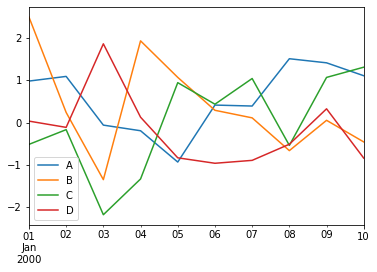

In [48]:
df = pd.DataFrame(np.random.randn(10,4),index=pd.date_range('1/1/2000',
   periods=10), columns=list('ABCD'))

df.plot()

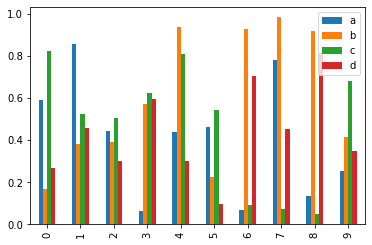

In [51]:
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot.bar()

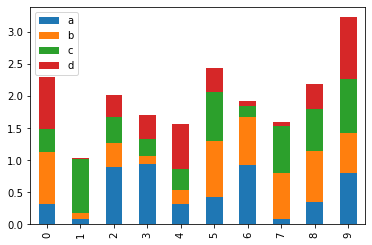

In [52]:
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot.bar(stacked=True)

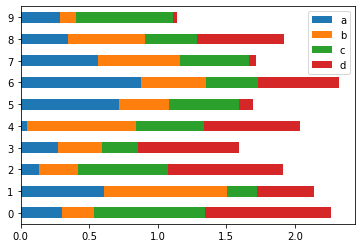

In [54]:
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])

df.plot.barh(stacked=True)

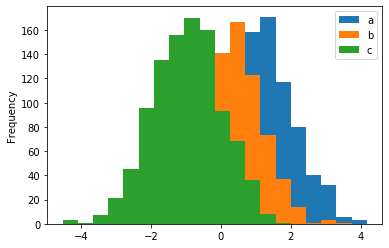

In [55]:
df = pd.DataFrame({'a':np.random.randn(1000)+1,'b':np.random.randn(1000),'c':
np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df.plot.hist(bins=20)

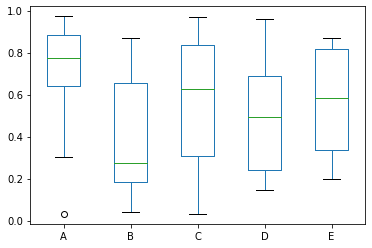

In [57]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()

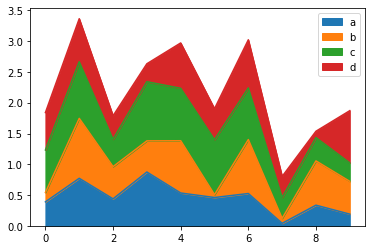

In [58]:

df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area()

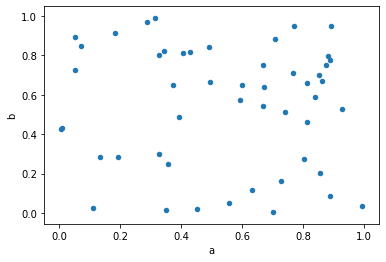

In [59]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000293D25D9940>],
      dtype=object)

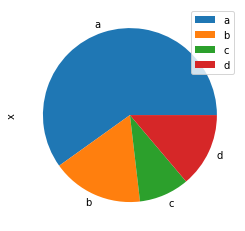

In [60]:

df = pd.DataFrame(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], columns=['x'])
df.plot.pie(subplots=True)

# THANK YOU